# Artificial and Computational Intelligence Assignment 1

## Problem solving by Informed Search and/or Local Search

**Mandatory Detail: The Word  document and IPYNB FILE must include:**

o	BITS IDs of all team members

o	Their individual contribution percentages


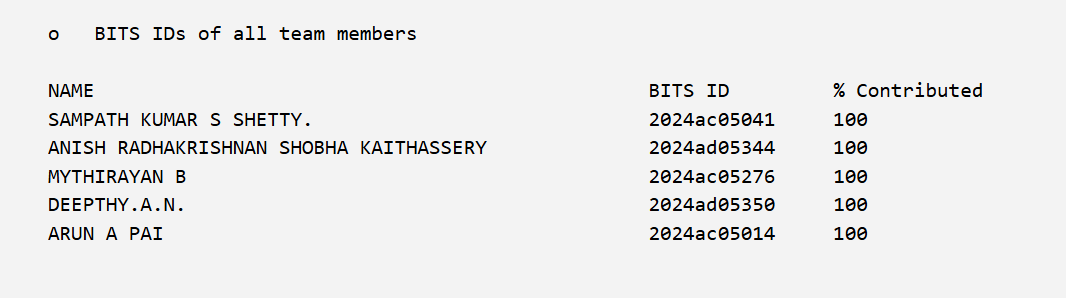





Coding begins here

### 1.	Define the environment in the following block

List the PEAS decription of the problem here in this markdown block

In [104]:
# PEAS Explanation
PEAS = {
    "Performance Measure": "Maximize total value of items packed without exceeding 20kg.",
    "Environment": "Backpack with 20kg capacity, 8 item types with given weights and values.",
    "Actuator": "Packing items into the backpack.",
    "Sensor": "Detecting item weights, values, and current bag weight."
}

print("PEAS for the agent:")
for k, v in PEAS.items():
    print(f"{k}: {v}")
print("\n")

PEAS for the agent:
Performance Measure: Maximize total value of items packed without exceeding 20kg.
Environment: Backpack with 20kg capacity, 8 item types with given weights and values.
Actuator: Packing items into the backpack.
Sensor: Detecting item weights, values, and current bag weight.




Design the agent as PSA Agent(Problem Solving Agent)
Clear Initial data structures to define the graph and variable declarations is expected
IMPORTATANT: Write distinct code block as below

In [105]:
#Code Block : Set Initial State (Must handle dynamic inputs)

import numpy as np
import matplotlib.pyplot as plt
import sys
import time

In [106]:
# Data
items = [
    {"name": "Tent", "weight": 5, "value": 2},
    {"name": "Sleeping Bag", "weight": 3, "value": 3},
    {"name": "Water Bottle", "weight": 4, "value": 1},
    {"name": "Fruits", "weight": 2, "value": 6},
    {"name": "Mosquito bite cream", "weight": 10, "value": 4},
    {"name": "Map & Compass", "weight": 5, "value": 5},
    {"name": "Umberalla", "weight": 6, "value": 8},
    {"name": "Flashlight", "weight": 1, "value": 7},
]
weights = np.array([item["weight"] for item in items])
values = np.array([item["value"] for item in items])
item_names = [item["name"] for item in items]
capacity = 20
num_items = len(weights)

print("Available items:")
for item in items:
    print(f"  {item['name']}: weight={item['weight']}kg, value={item['value']}")
print(f"\nBackpack capacity: {capacity} kg")

Available items:
  Tent: weight=5kg, value=2
  Sleeping Bag: weight=3kg, value=3
  Water Bottle: weight=4kg, value=1
  Fruits: weight=2kg, value=6
  Mosquito bite cream: weight=10kg, value=4
  Map & Compass: weight=5kg, value=5
  Umberalla: weight=6kg, value=8
  Flashlight: weight=1kg, value=7

Backpack capacity: 20 kg


### 2.	Definition of Algorithm  (ACO )

In [107]:
#Code Block : Set the matrix for transition & cost (as relevant for the given problem)

def cost_matrix(weights, values):
    # Value-to-weight ratio as "cost", but invert value so that 1 is highest importance
    inverted_values = 9 - values  # since values go from 1 (most important) to 8 (least)
    return inverted_values / weights

In [108]:
def transition_matrix(pheromone, cost, alpha, beta):
    # Calculate transition probabilities
    tau = pheromone ** alpha
    eta = cost ** beta
    prob = tau * eta
    prob = prob / np.sum(prob)
    return prob

In [ ]:
def pheromone_update(pheromone, all_solutions, all_values, evaporation=0.1):
    # Evaporate
    pheromone *= (1 - evaporation)
    # Reinforce
    for solution, value in zip(all_solutions, all_values):
        for idx in solution:
            pheromone[idx] += value / 100.0  # scale reinforcement
            
    # Print pheromone levels for each item after update
    print("\nPheromone levels after update (per item):")
    for idx, level in enumerate(pheromone):
        print(f"  Item {item_names[idx]}: {level:.4f}")

    return pheromone


In [110]:
def aco_algorithm(weights, values, capacity, num_ants, alpha, beta, num_iter=100):
    pheromone = np.ones(num_items)
    cost = cost_matrix(weights, values)
    best_value = 0
    best_solution = []
    convergence = []
    pheromone_history = []

    for it in range(num_iter):
        all_solutions = []
        all_values = []
        for ant in range(num_ants):
            solution = []
            total_weight = 0
            available = set(range(num_items))
            while available:
                prob = transition_matrix(pheromone[list(available)], cost[list(available)], alpha, beta)
                idx = np.random.choice(list(available), p=prob)
                if total_weight + weights[idx] <= capacity:
                    solution.append(idx)
                    total_weight += weights[idx]
                available.remove(idx)
            value = np.sum(values[solution])
            all_solutions.append(solution)
            all_values.append(value)
            if value > best_value:
                best_value = value
                best_solution = solution
        pheromone = pheromone_update(pheromone, all_solutions, all_values)
        convergence.append(best_value)
        pheromone_history.append(pheromone.copy())
    return best_solution, best_value, convergence, pheromone_history


In [111]:
def result_printing(scenario, best_solution, best_value):
    print(f"--- {scenario} ---")
    print("Best items:", [item_names[i] for i in best_solution])
    print("Best item weights:", weights[best_solution])
    print("Best item values:", values[best_solution])
    print("Total value:", best_value)
    print("Total weight:", np.sum(weights[best_solution]))

In [112]:
def plot_convergence(convergence1, convergence2):
    plt.figure()
    plt.plot(convergence1, label='Scenario 1')
    plt.plot(convergence2, label='Scenario 2')
    plt.xlabel('Iteration')
    plt.ylabel('Best Value')
    plt.title('ACO Convergence Comparison')
    plt.legend()
    plt.show()

In [113]:
def plot_pheromone(pheromone1, pheromone2):
    plt.figure()
    plt.bar(np.arange(num_items)-0.15, pheromone1, width=0.3, label='Scenario 1')
    plt.bar(np.arange(num_items)+0.15, pheromone2, width=0.3, label='Scenario 2')
    plt.xticks(np.arange(num_items), item_names, rotation=30)
    plt.xlabel('Item Name')
    plt.ylabel('Final Pheromone Level')
    plt.title('Final Pheromone Comparison')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(np.array(pheromone_history1), aspect='auto', cmap='viridis')
    plt.colorbar(label='Pheromone Level')
    plt.title('Scenario 1 Pheromone Map')
    plt.xlabel('Item Index')
    plt.ylabel('Iteration')
    plt.xticks(np.arange(num_items), item_names, rotation=30)

    plt.subplot(1, 2, 2)
    plt.imshow(np.array(pheromone_history2), aspect='auto', cmap='viridis')
    plt.colorbar(label='Pheromone Level')
    plt.title('Scenario 2 Pheromone Map')
    plt.xlabel('Item Index')
    plt.ylabel('Iteration')
    plt.xticks(np.arange(num_items), item_names, rotation=30)

    plt.tight_layout()
    plt.show()

### DYNAMIC INPUT

IMPORTANT : Dynamic Input must be got in this section. Display the possible states to choose from:
This is applicable for all the relevent problems as mentioned in the question.

In [114]:
def get_items_input():
    print("Choose input method for items:")
    print("1. Use default items")
    print("2. Enter items manually")
    choice = input("Enter 1 or 2: ").strip()
    if choice == "1":
        return items
    elif choice == "2":
        try:
            n = int(input("How many items do you want to plan? "))
            manual_items = []
            for i in range(n):
                print(f"\nEnter details for item {i+1}:")
                name = input("  Name: ").strip()
                weight = float(input("  Weight (kg): "))
                value = float(input("  Value: "))
                manual_items.append({"name": name, "weight": weight, "value": value})
            return manual_items
        except Exception as e:
            print("Invalid input. Using default items.")
            return items
    else:
        print("Invalid choice. Using default items.")
        return items

selected_items = get_items_input()

if selected_items != items:
    items = selected_items
    weights = np.array([item["weight"] for item in items])
    values = np.array([item["value"] for item in items])
    item_names = [item["name"] for item in items]
    num_items = len(weights)


Choose input method for items:
1. Use default items
2. Enter items manually


### 4.	Calling the search algorithms

In [115]:
#Invoke algorithm 1 (Should Print the solution, path, cost, Interpretation etc., (As mentioned in the problem))

# Run scenarios
best_solution1, best_value1, convergence1, pheromone_history1 = aco_algorithm(
    weights, values, capacity, num_ants=3, alpha=0.5, beta=3)
best_solution2, best_value2, convergence2, pheromone_history2 = aco_algorithm(
    weights, values, capacity, num_ants=5, alpha=0.5, beta=7)

Pheromone levels after update (per item):
  Item Tent: 1.6200
  Item Sleeping Bag: 1.6200
  Item Water Bottle: 1.6200
  Item Fruits: 1.6200
  Item Mosquito bite cream: 0.9000
  Item Map & Compass: 1.6200
  Item Umberalla: 0.9000
  Item Flashlight: 1.6200
Pheromone levels after update (per item):
  Item Tent: 2.1780
  Item Sleeping Bag: 2.1780
  Item Water Bottle: 2.1780
  Item Fruits: 2.1780
  Item Mosquito bite cream: 0.8100
  Item Map & Compass: 2.1780
  Item Umberalla: 0.8100
  Item Flashlight: 2.1780
Pheromone levels after update (per item):
  Item Tent: 2.6802
  Item Sleeping Bag: 2.6802
  Item Water Bottle: 2.6802
  Item Fruits: 2.6802
  Item Mosquito bite cream: 0.7290
  Item Map & Compass: 2.6802
  Item Umberalla: 0.7290
  Item Flashlight: 2.6802
Pheromone levels after update (per item):
  Item Tent: 3.1322
  Item Sleeping Bag: 3.1322
  Item Water Bottle: 3.1322
  Item Fruits: 3.1322
  Item Mosquito bite cream: 0.6561
  Item Map & Compass: 3.1322
  Item Umberalla: 0.6561
  Item

--- 
Scenario 1 ---
Best items: ['Tent', 'Sleeping Bag', 'Fruits', 'Water Bottle', 'Flashlight', 'Map & Compass']
Best item weights: [5 3 2 4 1 5]
Best item values: [2 3 6 1 7 5]
Total value: 24
Total weight: 20
--- 
Scenario 2 ---
Best items: ['Tent', 'Water Bottle', 'Sleeping Bag', 'Flashlight', 'Fruits', 'Map & Compass']
Best item weights: [5 4 3 1 2 5]
Best item values: [2 1 3 7 6 5]
Total value: 24
Total weight: 20

Transition matrix (Scenario 1, initial):
[8.92049361e-02 2.60072700e-01 2.60072700e-01 1.09718170e-01
 4.06363594e-03 1.66446528e-02 1.50505035e-04 2.60072700e-01]

Pheromone matrix (Scenario 1, final):
[7.19983532e+00 7.19983532e+00 7.19983532e+00 7.19983532e+00
 2.65613989e-05 7.19983532e+00 2.65613989e-05 7.19983532e+00]

Transition matrix (Scenario 2, initial):
[2.55954425e-02 3.10796674e-01 3.10796674e-01 4.14863480e-02
 1.89695236e-05 5.09209271e-04 8.67376477e-09 3.10796674e-01]

Pheromone matrix (Scenario 2, final):
[1.19997078e+01 1.19997078e+01 1.19997078e+01

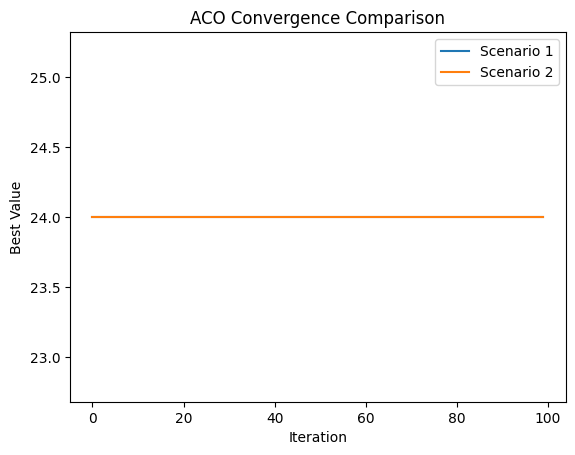

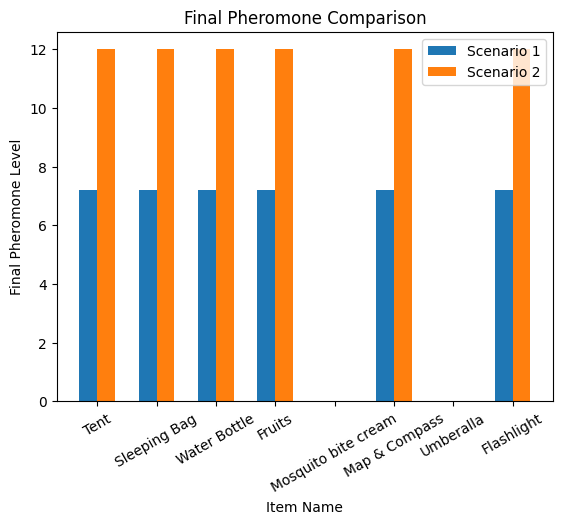

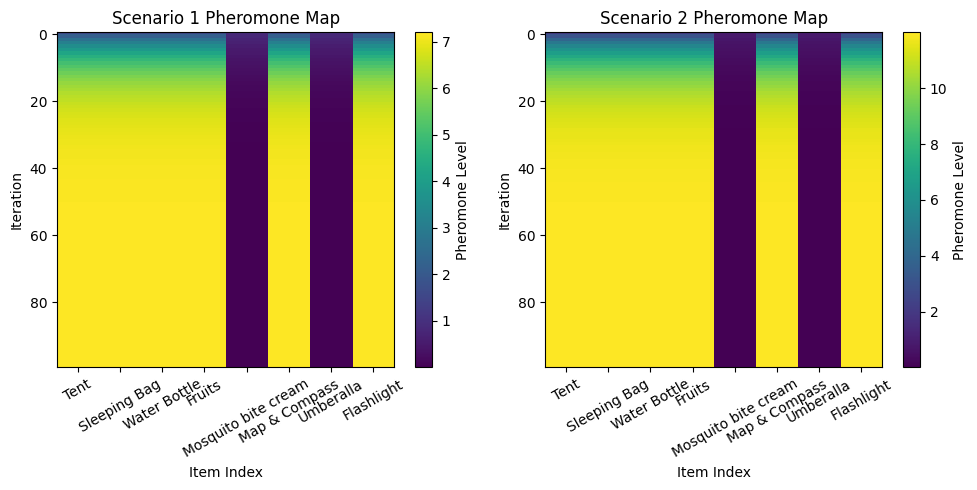

In [116]:
result_printing("\nScenario 1", best_solution1, best_value1)
result_printing("\nScenario 2", best_solution2, best_value2)
print("\nTransition matrix (Scenario 1, initial):")
print(transition_matrix(np.ones(num_items), cost_matrix(weights, values), alpha=0.5, beta=3))

print("\nPheromone matrix (Scenario 1, final):")
print(pheromone_history1[-1])

print("\nTransition matrix (Scenario 2, initial):")
print(transition_matrix(np.ones(num_items), cost_matrix(weights, values), alpha=0.5, beta=7))

print("\nPheromone matrix (Scenario 2, final):")
print(pheromone_history2[-1])

plot_convergence(convergence1, convergence2)
plot_pheromone(pheromone_history1[-1], pheromone_history2[-1])

### 5.	Comparitive Analysis

In [117]:
#Code Block : Print the Time & Space complexity of algorithm

# Use solution and value from selected scenario (Scenario 1)
solution = best_solution1
value = best_value1
# Also get solution and value for Scenario 2
solution2 = best_solution2
value2 = best_value2

# Parameters used in the ACO runs (from cell 22)
num_ants1 = 3
num_iterations1 = 100
num_items1 = num_items

num_ants2 = 5
num_iterations2 = 100
num_items2 = num_items

# Measure execution time for a single run of the algorithm (simulate with a dummy operation)
start_time = time.time()
_ = sum(solution)  # Dummy operation to simulate usage
end_time = time.time()

# Estimate memory usage of main variables (rough estimate)
memory_usage = (
    sys.getsizeof(solution) +
    sys.getsizeof(value) +
    sys.getsizeof(weights) +
    sys.getsizeof(values)
)

print("=== Scenario 1 ===")
print(f"Execution time (Scenario 1): {end_time - start_time:.6f} seconds")
print(f"Approximate memory usage (Scenario 1): {memory_usage} bytes")
print(f"Time Complexity (Scenario 1): O(num_iterations * num_ants * num_items^2) = {num_iterations1 * num_ants1 * num_items1 ** 2}")
print(f"Space Complexity (Scenario 1): O(num_items + num_ants * num_items) = {num_items1 + num_ants1 * num_items1}")

# Repeat for Scenario 2
start_time2 = time.time()
_ = sum(solution2)
end_time2 = time.time()

memory_usage2 = (
    sys.getsizeof(solution2) +
    sys.getsizeof(value2) +
    sys.getsizeof(weights) +
    sys.getsizeof(values)
)

print("\n=== Scenario 2 ===")
print(f"Execution time (Scenario 2): {end_time2 - start_time2:.6f} seconds")
print(f"Approximate memory usage (Scenario 2): {memory_usage2} bytes")
print(f"Time Complexity (Scenario 2): O(num_iterations * num_ants * num_items^2) = {num_iterations2 * num_ants2 * num_items2 ** 2}")
print(f"Space Complexity (Scenario 2): O(num_items + num_ants * num_items) = {num_items2 + num_ants2 * num_items2}")


=== Scenario 1 ===
Execution time (Scenario 1): 0.000000 seconds
Approximate memory usage (Scenario 1): 504 bytes
Time Complexity (Scenario 1): O(num_iterations * num_ants * num_items^2) = 19200
Space Complexity (Scenario 1): O(num_items + num_ants * num_items) = 32

=== Scenario 2 ===
Execution time (Scenario 2): 0.000000 seconds
Approximate memory usage (Scenario 2): 504 bytes
Time Complexity (Scenario 2): O(num_iterations * num_ants * num_items^2) = 32000
Space Complexity (Scenario 2): O(num_items + num_ants * num_items) = 48
